Titanic (Desision Tree & Random Forest)

In [3]:
#Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

In [5]:
#Here we are dropping Ticket and Cabin columns
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [6]:
#Here we are looking for all unique titles
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#Comparing which titles corrilate to sex
pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:
#Here we are changing the titles to make it more understandable
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [8]:
#Here we are creating a map and adding it to a new column named title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [9]:
#Here we will start guessing the age of passangers and add random noise  pased on 
#Pclass and Gender combinations

guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [10]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 10), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 15), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 20), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 35), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 40), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 45), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 50), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 55), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 60), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 65), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 65) & (dataset['Age'] <= 70), 'Age'] = 13
    dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 75), 'Age'] = 14
    dataset.loc[(dataset['Age'] > 75) & (dataset['Age'] <= 80), 'Age'] = 15
    dataset.loc[ dataset['Age'] > 80, 'Age'] 
train_df.head()

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,4,1,0,7.2500,S,1
1,1,1,1,7,1,0,71.2833,C,3
2,1,3,1,5,0,0,7.9250,S,2
3,1,1,1,6,1,0,53.1000,S,3
4,0,3,0,6,0,0,8.0500,S,1


In [11]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

In [12]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


In [13]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 5) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 20), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 25), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 30), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 30, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]


X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

Decision Tree Model

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

In [14]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt.criterion = "gini"
dt.splitter = "random"
dt.max_depth = 20

dt.score(X_test)

[Text(0.5472513496677741, 0.9666666666666667, 'X[5] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.30712728405315615, 0.9, 'X[0] <= 1.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.16943521594684385, 0.8333333333333334, 'X[7] <= 9.5\ngini = 0.452\nsamples = 107\nvalue = [70, 37]'),
 Text(0.07973421926910298, 0.7666666666666667, 'X[3] <= 2.0\ngini = 0.48\nsamples = 85\nvalue = [51, 34]'),
 Text(0.07308970099667775, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.08637873754152824, 0.7, 'X[3] <= 4.5\ngini = 0.489\nsamples = 80\nvalue = [46, 34]'),
 Text(0.026578073089700997, 0.6333333333333333, 'X[6] <= 0.5\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(0.019933554817275746, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03322259136212625, 0.5666666666666667, 'X[7] <= 6.5\ngini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(0.019933554817275746, 0.5, 'X[7] <= 5.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Te

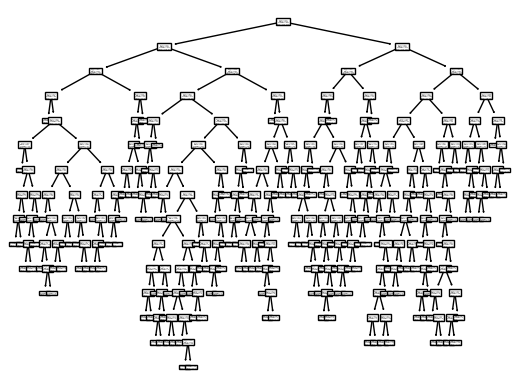

In [15]:
#Plotting Desision Tree
from sklearn import tree
tree.plot_tree(dt)

Five-fold Cross Validation for Binary Tree

In [20]:
from sklearn.model_selection import cross_val_score

dt_score = cross_val_score(dt, X_train, Y_train, cv = 5)
print(round(np.average(dt_score) * 100, 2))


78.34


Random Forest Tuning and Five-Fold Cross Validation 

In [22]:
rt = RandomForestClassifier()
rt.fit(X_train, Y_train)
rt.criterion = "gini"
rt.max_depth = 20

In [24]:
rt_score = cross_val_score(rt, X_train, Y_train, cv = 5)
print(round(np.average(rt_score) * 100, 2))

79.12
